In [1]:
!git clone https://github.com/vincentnam/ProjetInterpromo2020G8.git

fatal: le chemin de destination 'ProjetInterpromo2020G8' existe déjà et n'est pas un répertoire vide.


In [2]:
"""
Created on Fri Jan 3 13:28:13 CET 2019
Group 8
@authors: DANG Vincent-Nam
"""

from abc import ABCMeta, abstractmethod
from typing import Iterable

import numpy as np
from pipeline import Process, Preprocess, Postprocess, Pipeline, overrides, MetaProcess, NotProcessClass


import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
from collections import defaultdict
from PIL import Image
# TODO :
#  - Tests unitaires et tests intégrations : test pipeline
#  (run_pipeline), levées d'erreur, etc...
#  - Traduire les commentaires en anglais (si besoin ?)
#  - Mettre à jour le pipeline pour prendre en compte des resultats
#    auxiliaires nécessaire pour le traitement suivant
#  - Gestion des hints plus formellement
#  - Gestion de l'héritage des docstrings



In [3]:
class ImageUtil():
    def __init__(self, input_path=None, image_name= None):
        self.input_path = input_path
        self.image_name = image_name
        ''' 
        if image is None:
            self.image_pil = Image.open(self.input_path + self.image_name)
            self.image_plt = plt.imread(self.input_path + self.image_name)
        else:
            self.image_pil = image
            self.image_plt = image
            self.image = image
        '''
        self.sort_pixel = {}

    def sort_pixel(self,image):
        """
            Sort the pixel value by number of occurences that they appear in the image
        """

        by_color = defaultdict(int)
        for pixel in image.getdata():
            by_color[pixel] += 1

        self.sort_pixel = {k: v for k, v in
                           sorted(by_color.items(), key=lambda item: item[1],
                                  reverse=True)}

    def visualisation(self, image, x_size, y_size):
        """
            Show the image
            params : 
                x_size - width of the plot
                y_size - height of the plot
        """
        plt.figure(figsize=(x_size, y_size))
        if image is not None:
            plt.imshow(image.astype('uint8'))
        else:
            plt.imshow(image.astype('uint8'))

    def to_rgb(self, image):
        """
            Convert the image to an RGB format from a BGR format
        """
        return cv.cvtColor(image, cv.COLOR_BGR2RGB)

    def to_gray(self,image):
        """
            Convert the image to a GRAY format from a BGR format
        """
        return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    def save_image(self,image_name, image, output_path):
        """
            Save the image to specific location
            params : 
                output_path - where the image will be saved
        """
        plt.imsave(output_path + image_name,
                   image.astype('uint8'))



In [4]:
# SIEGE 


# def coord_pattern_finder(image, template, threshold):
#     """
#     input:
#         image : image plane cv2.imread() black and white
#         template : image pattern cv2.imread()
#         threshold : threshold for this pattern
#     output:
#         position : list right angle position for this pattern on the image

#     """
#     position = []  # Variable output
#     # List of match
#     res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
#     for pos in zip(*np.where(res >= threshold)[::-1]):
#         position.append(pos)
#     return(position)



In [5]:
    
class NormalSeatNoCL(Process):
    process_desc = "OpenCV4.1.2.30 -> pattern matching " \
                   "for seat without colors or letters"
    
    @overrides
    def run(self, image: Iterable, json, threshold) -> None:
        position = []  # Variable output
        # List of match
        res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
        for pos in zip(*np.where(res >= threshold)[::-1]):
            position.append(pos)
        json["normal_seat"]= position




In [6]:
from IPython.display import SVG
import matplotlib.pyplot as plt
# SVG(url='https://cdn.seatguru.com/en_US/img/20200108203441/seatguru/airlines_new/Aer_Lingus/Aer_Lingus_Airbus_A330-200.svg')


In [7]:

def Coucoutest(image):
    ImageUtil().to_gray(image)
    #cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    

None


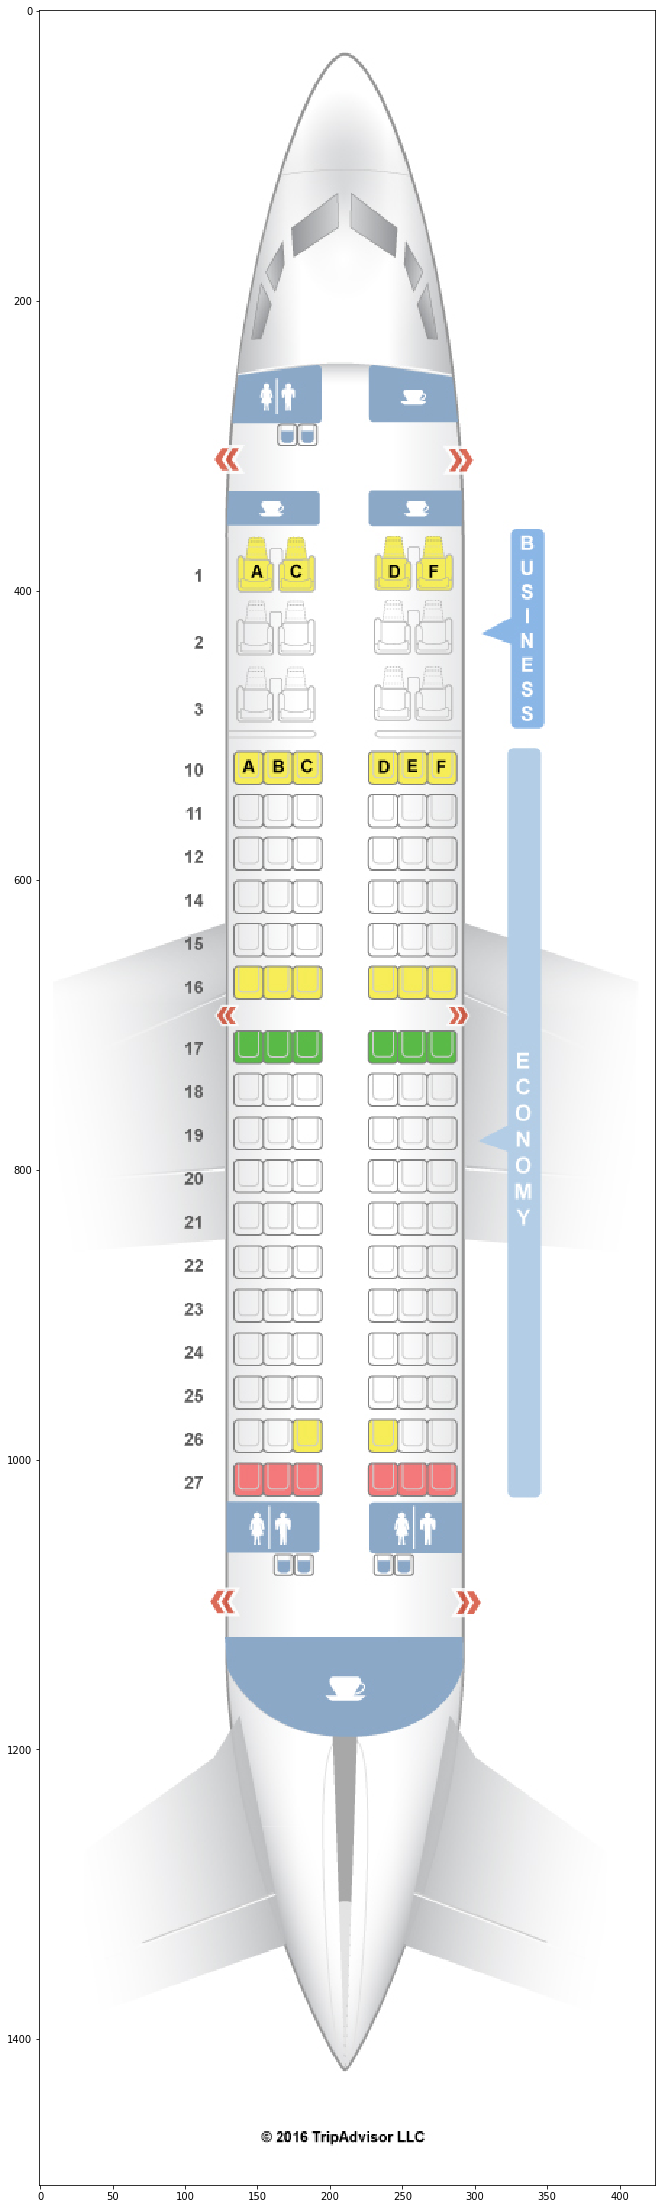

In [8]:

img = plt.imread("/data/git-clone/ProjetInterpromo2020G8/Oman_Air_Boeing_737-700_new_plane686.jpg")
plt.figure(figsize=(20,40))
plt.imshow(img)
img = Coucoutest(img)
print(img)

None


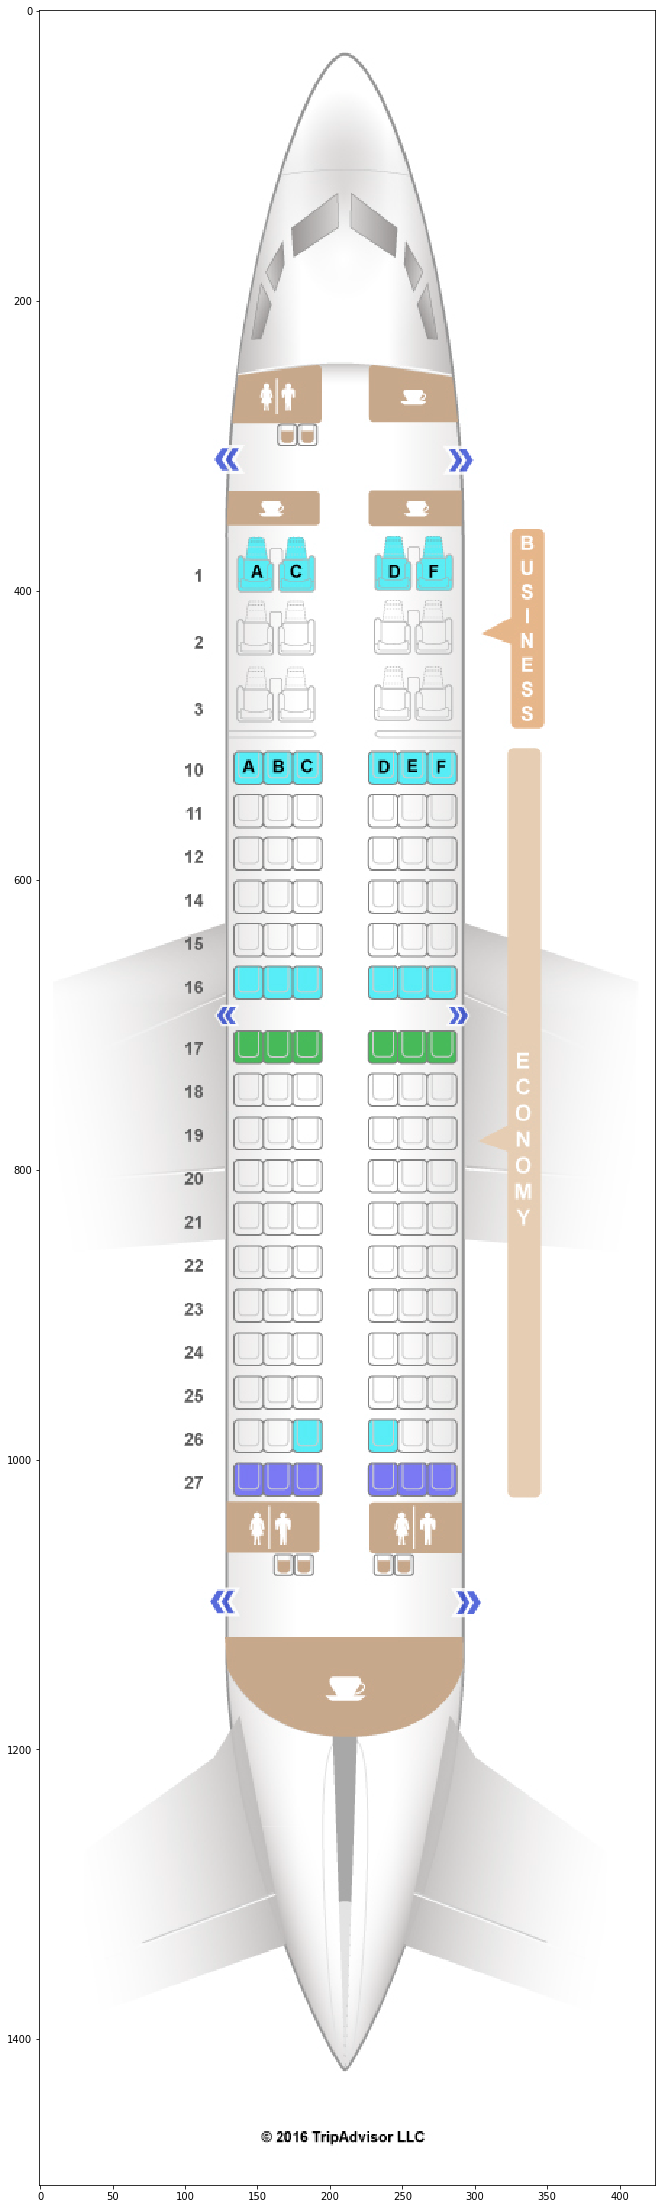

In [9]:

img = cv.imread("/data/git-clone/ProjetInterpromo2020G8/Oman_Air_Boeing_737-700_new_plane686.jpg")
plt.figure(figsize=(20,40))
plt.imshow(img)
img = Coucoutest(img)
print(img)

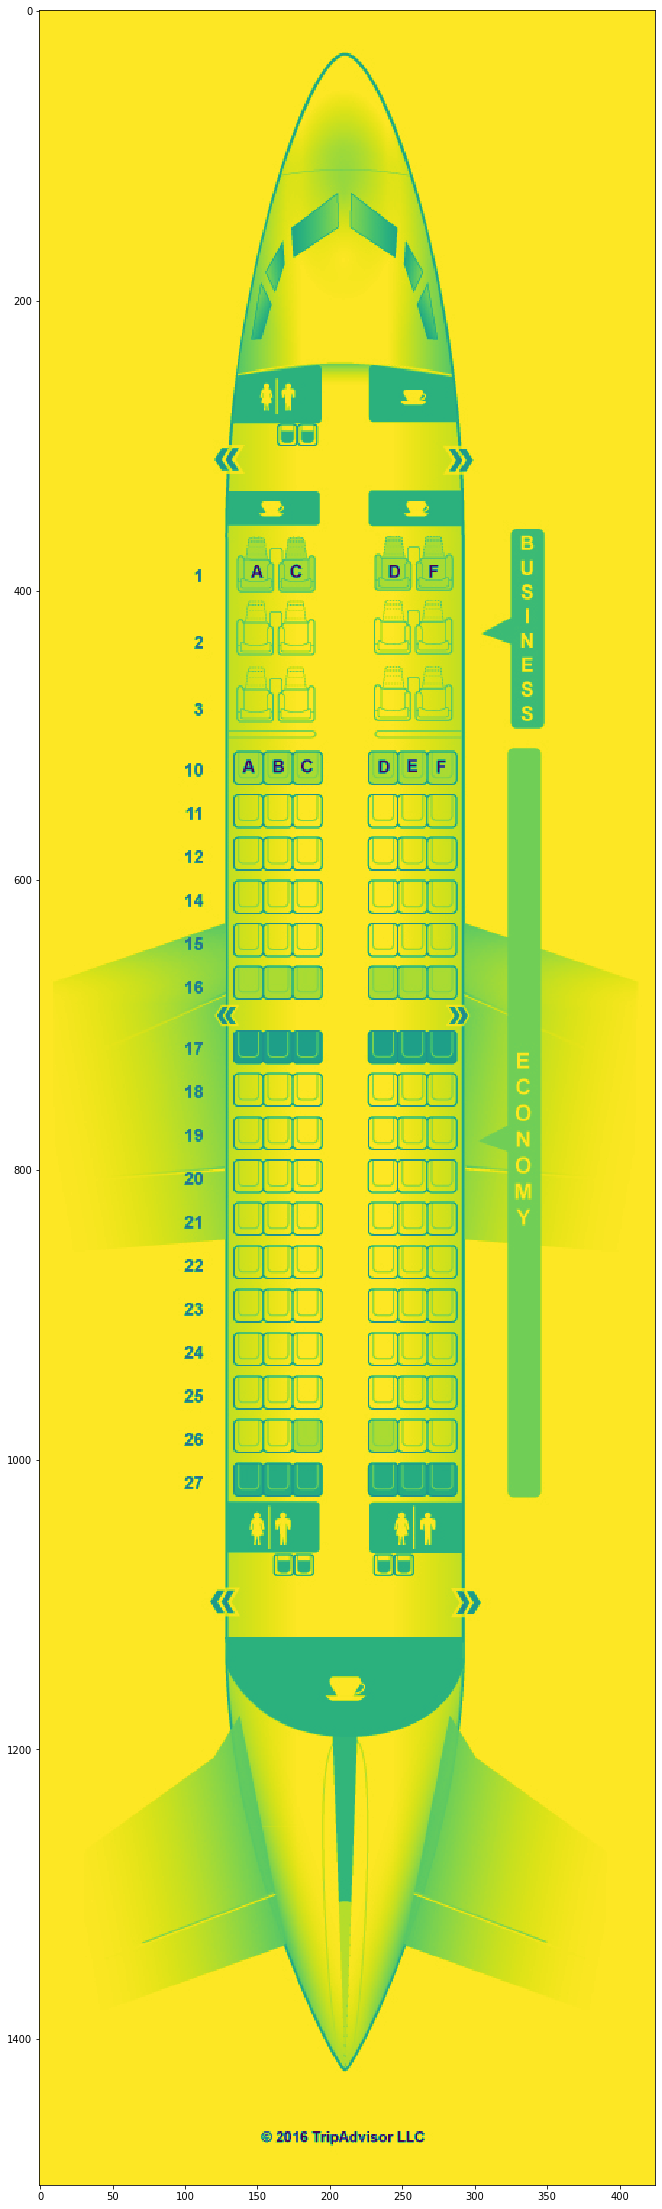

In [10]:

img = cv.imread("/data/git-clone/ProjetInterpromo2020G8/Oman_Air_Boeing_737-700_new_plane686.jpg")
plt.figure(figsize=(20,40))
#plt.imshow(img)
img =cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img)

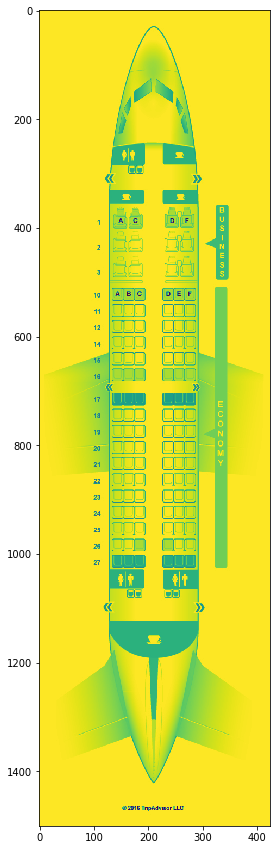

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(img)

In [12]:
class ColourPipeline(Preprocess):
    process_desc = "Standard Python >= 3.5 -> preprocess colours"
    
    def run(self, **kwargs) -> Iterable:
        return self.col_obj.colour_pipeline(colours = {}, epsilon = 40, colour_mode = False, 
                            default_colour = [255, 255, 255], rgb_len = 3)
    
    
class BlackWhite(Preprocess):
    process_desc = "OpenCV4.1.2.30 -> rgb to grey"

    def run(self, **kwargs) -> Iterable:
        return self.util_obj.to_gray()



In [14]:
class PatternMatchingNormalSeat(Process):
    process_desc = "OpenCV4.1.2.30 -> pattern matching normal seat"
    
    def run(self, image, json, image_rgb = None, col_obj = None, templates = None, data_image=None, **kwargs) -> None :
        #col_obj = Colour(data_path, layouts[0], p)
        #col_obj = Colour(data_image[0], data_image[1][0], data_image[2])
        
    # Make a colour detection based on the layout type ('GURU' or 'MAESTRO') and image type('png', 'jpg')
        img_to_show = image
        if data_image is None:
            print("COUCOU")
        img_rgb = image_rgb
        img_gray = image
        #img_rgb = cv.imread(data_image, 1)
        #img_gray = cv.imread(data_image, 0)
        print(data_image + ' shape', img_gray.shape)

        for template_name in templates:
            #template = cv.imread(templates_path + template_name, 0)
            template = cv.imread("./images" + template_name, 0)
            h, w = template.shape
            print(template_name, h,w)

            threshold = 0.8 #  Default threshold
            # Choose threshold for each template
            if template_name == 'temp_business_seat_armrest_left.jpg':
                threshold = 0.6
            elif template_name == 'temp_business_seat_armrest_right.jpg':
                threshold = 0.6
            elif template_name == 'temp_business_seat_footrest.jpg':
                threshold = 1
            elif template_name == 'temp_first_seat.jpg':
                threshold = 1
            elif template_name == 'temp_normal_seat.png':
                threshold = 0.7
            elif template_name == 'temp_normal_seat_elec.jpg':
                threshold = 1
            elif template_name == 'temp_normal_seat_little.jpg':
                threshold = 0.65
            elif template_name == 'temp_yellow_seat.jpg':
                threshold = 1

            position = coord_pattern_finder(img_gray, template, threshold)

            for pos in position:
                img_to_show = cv.rectangle(img_to_show, pos, (pos[0] + w, pos[1] + h), (0, 0, 255), 2)
        json["standard_seat"] = position
        plt.figure(figsize=(20, 40))
        plt.imshow(img_to_show.astype('uint8'))
        print(json)

In [15]:
  '''  
    col_obj = Colour(data_path, layouts[0], p)
    
    # Make a colour detection based on the layout type ('GURU' or 'MAESTRO') and image type('png', 'jpg')
    img_gray = col_obj.colour_pipeline(colours = {}, epsilon = 40, colour_mode = False, 
                        default_colour = [255, 255, 255], rgb_len = 3)
    img_to_show = img_gray
    img_gray = cv.cvtColor(img_gray, cv.COLOR_RGB2GRAY)
    
    img_rgb = cv.imread(planes_path + p, 1)planes_path + p
#     img_gray = cv.imread(planes_path + p, 0)
    print(p + ' shape', img_gray.shape)
    
    for template_name in templates:
        template = cv.imread(templates_path + template_name, 0)
        h, w = template.shape
        print(template_name, h,w)

        threshold = 0.8 #  Default threshold
        # Choose threshold for each template
        if template_name == 'temp_business_seat_armrest_left.jpg':
            threshold = 0.6
        elif template_name == 'temp_business_seat_armrest_right.jpg':
            threshold = 0.6
        elif template_name == 'temp_business_seat_footrest.jpg':
            threshold = 1
        elif template_name == 'temp_first_seat.jpg':
            threshold = 1
        elif template_name == 'temp_normal_seat.png':
            threshold = 0.7
        elif template_name == 'temp_normal_seat_elec.jpg':
            threshold = 1
        elif template_name == 'temp_normal_seat_little.jpg':
            threshold = 0.65
        elif template_name == 'temp_yellow_seat.jpg':
            threshold = 1

        position = coord_pattern_finder(img_gray, template, threshold)

        for pos in position:
            img_to_show = cv.rectangle(img_to_show, pos, (pos[0] + w, pos[1] + h), (0, 0, 255), 2)

    plt.figure(figsize=(20, 40))
    plt.imshow(img_to_show.astype('uint8'))
    
    ''' 

"  \n  col_obj = Colour(data_path, layouts[0], p)\n  \n  # Make a colour detection based on the layout type ('GURU' or 'MAESTRO') and image type('png', 'jpg')\n  img_gray = col_obj.colour_pipeline(colours = {}, epsilon = 40, colour_mode = False, \n                      default_colour = [255, 255, 255], rgb_len = 3)\n  img_to_show = img_gray\n  img_gray = cv.cvtColor(img_gray, cv.COLOR_RGB2GRAY)\n  \n  img_rgb = cv.imread(planes_path + p, 1)planes_path + p\n#     img_gray = cv.imread(planes_path + p, 0)\n  print(p + ' shape', img_gray.shape)\n  \n  for template_name in templates:\n      template = cv.imread(templates_path + template_name, 0)\n      h, w = template.shape\n      print(template_name, h,w)\n\n      threshold = 0.8 #  Default threshold\n      # Choose threshold for each template\n      if template_name == 'temp_business_seat_armrest_left.jpg':\n          threshold = 0.6\n      elif template_name == 'temp_business_seat_armrest_right.jpg':\n          threshold = 0.6\n      eli

In [16]:
''' 
class SeatPattern(Process):
    process_desc = "OpenCV4.1.2.30 -> pattern matching"
    
    def run(self, image, json, **kwargs):
        json["seat"] = 
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])


def image_process_label(image):
    grayscale = rgb2gray(image)
    thresh = threshold_otsu(grayscale)
    bw = closing(grayscale > thresh, square(3))
    cleared = clear_border(bw)
    label_image = label(cleared)
    return label_image

def label_results(images_path_list, min_rectangle_area = 80):
    # the result will be store in this list
    image_detection_result = []
    
    for image_path in images_path_list:
        # get the image
        image = plt.imread(image_path)
        
        # get the different area
        label_image = image_process_label(image)
        props = regionprops(label_image)

        # prepare the image info
        image_detection_result.append({
            'image_name': image_path.split('/')[-1],
            "areas": [],
            "rectangles": [],
            "diameters": [],
            "coordinates": []
        })
        
        # the last index in the list
        len_list = len(image_detection_result) - 1
        
        # by region find every rectangle that will interesting us
        for region in props:
            # bigger enough area chosen
            if region.area >= min_rectangle_area:
                image_detection_result[len_list]['areas'].append(region['Area'])
                image_detection_result[len_list]['rectangles'].append(region['BoundingBox'])
                image_detection_result[len_list]['diameters'].append(region['EquivDiameter'])
                image_detection_result[len_list]['coordinates'].append(region['Coordinates'])
                
    return pd.DataFrame(image_detection_result)

# Get the path + image_name info
images_path_list = [pre_processed_path + img for img in os.listdir(pre_processed_path)]
df = label_results(images_path_list)
''' 

' \nclass SeatPattern(Process):\n    process_desc = "OpenCV4.1.2.30 -> pattern matching"\n    \n    def run(self, image, json, **kwargs):\n        json["seat"] = \ndef rgb2gray(rgb):\n    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])\n\n\ndef image_process_label(image):\n    grayscale = rgb2gray(image)\n    thresh = threshold_otsu(grayscale)\n    bw = closing(grayscale > thresh, square(3))\n    cleared = clear_border(bw)\n    label_image = label(cleared)\n    return label_image\n\ndef label_results(images_path_list, min_rectangle_area = 80):\n    # the result will be store in this list\n    image_detection_result = []\n    \n    for image_path in images_path_list:\n        # get the image\n        image = plt.imread(image_path)\n        \n        # get the different area\n        label_image = image_process_label(image)\n        props = regionprops(label_image)\n\n        # prepare the image info\n        image_detection_result.append({\n            \'image_name\': image_path.s

In [17]:
pipeline = Pipeline("/data/git-clone/ProjetInterpromo2020G8/","Oman_Air_Boeing_737-700_new_plane686.jpg")
pipeline.add_processes([ColourPipeline,BlackWhite,PatternMatchingNormalSeat ])

Standard Python >= 3.5 -> preprocess colours a été ajouté.
OpenCV4.1.2.30 -> rgb to grey a été ajouté.
OpenCV4.1.2.30 -> pattern matching normal seat a été ajouté.


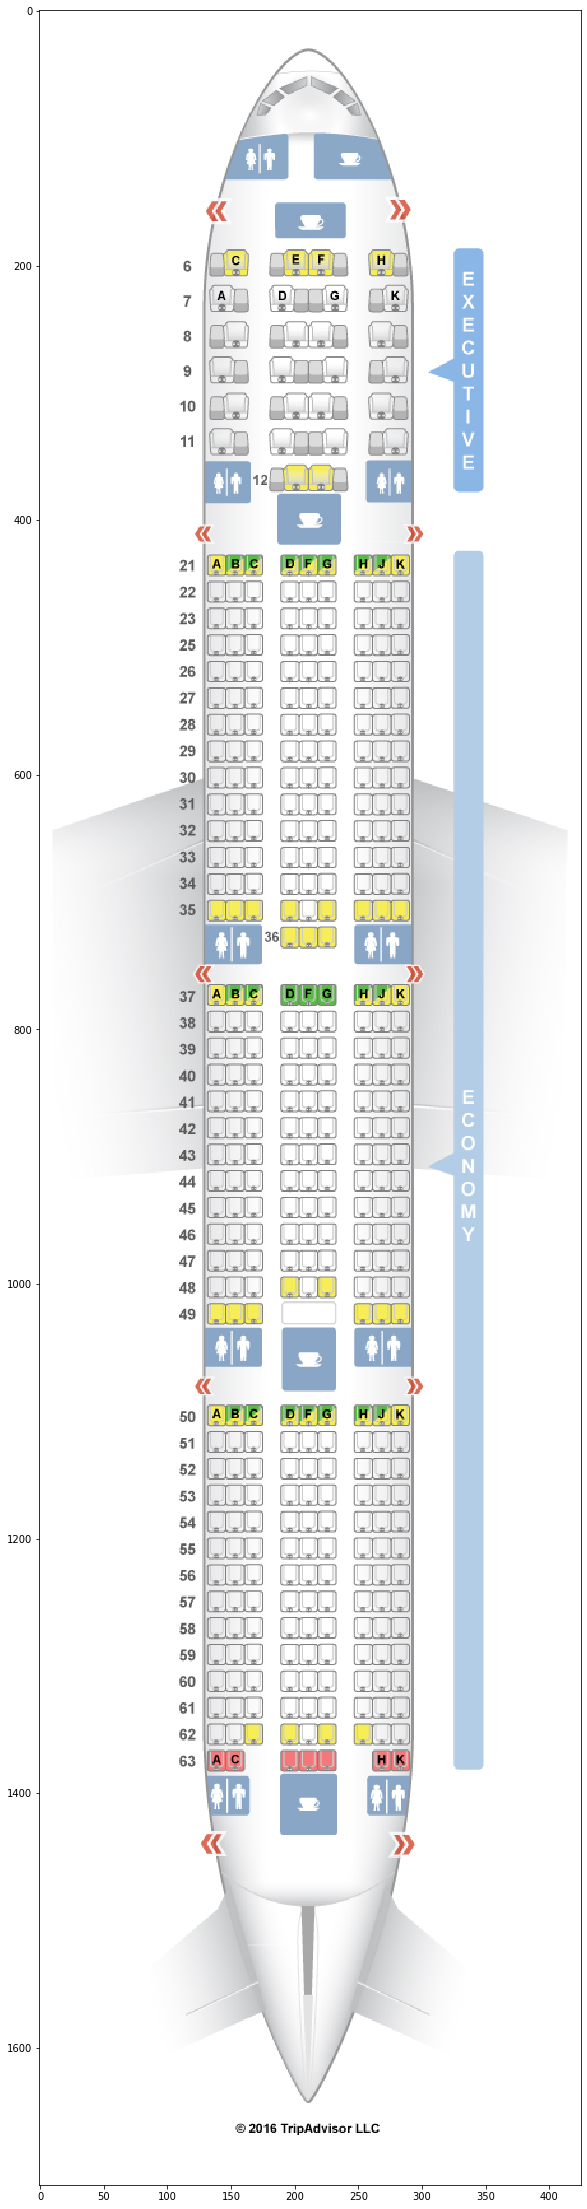

Début du pipeline : 
Preprocess :  Standard Python >= 3.5 -> preprocess colours
Doing : Standard Python >= 3.5 -> preprocess colours


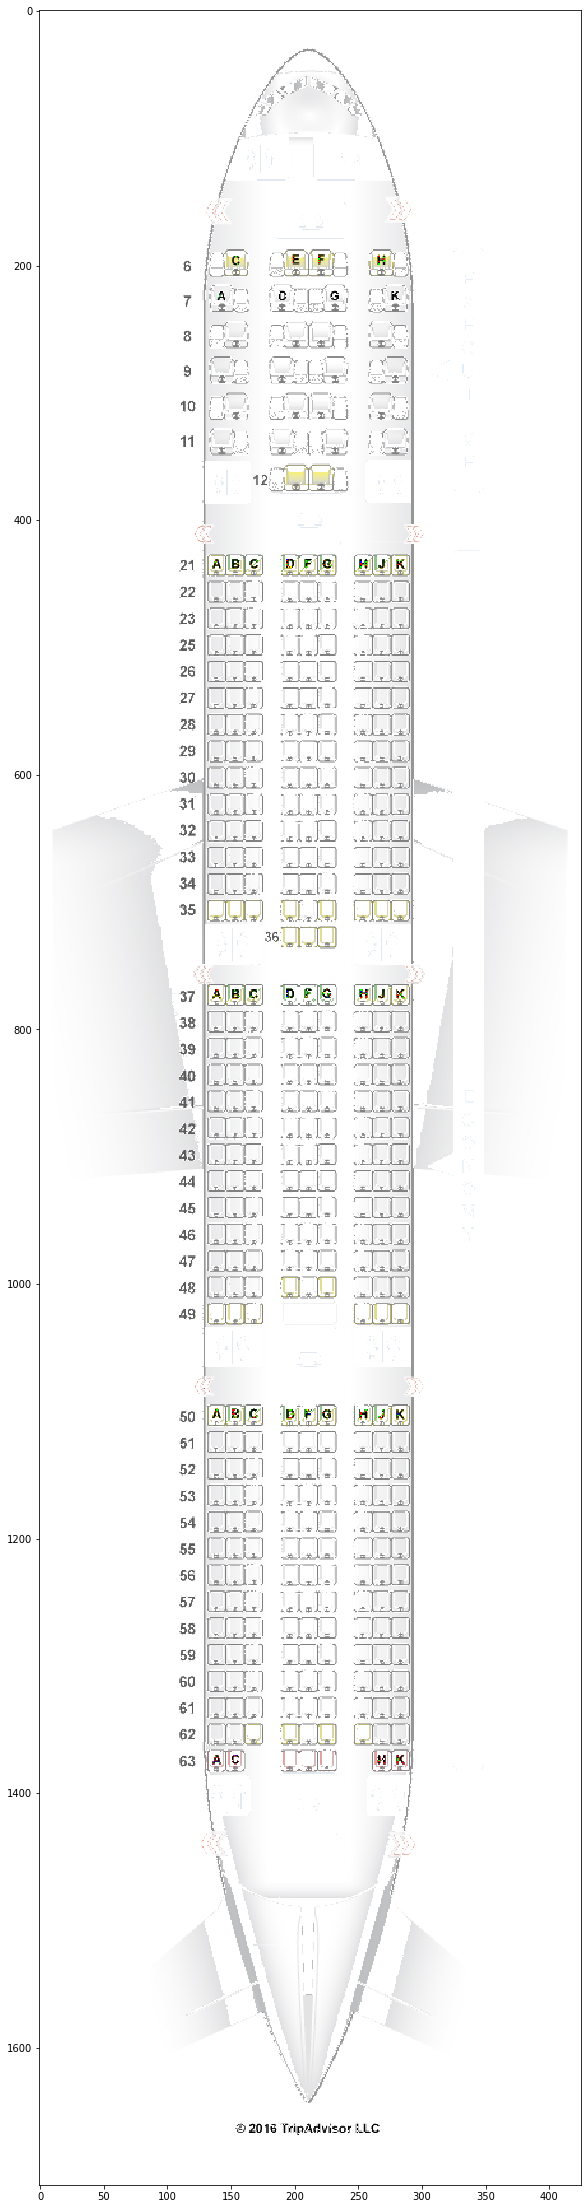

Preprocess :  OpenCV4.1.2.30 -> rgb to grey
Doing : OpenCV4.1.2.30 -> rgb to grey


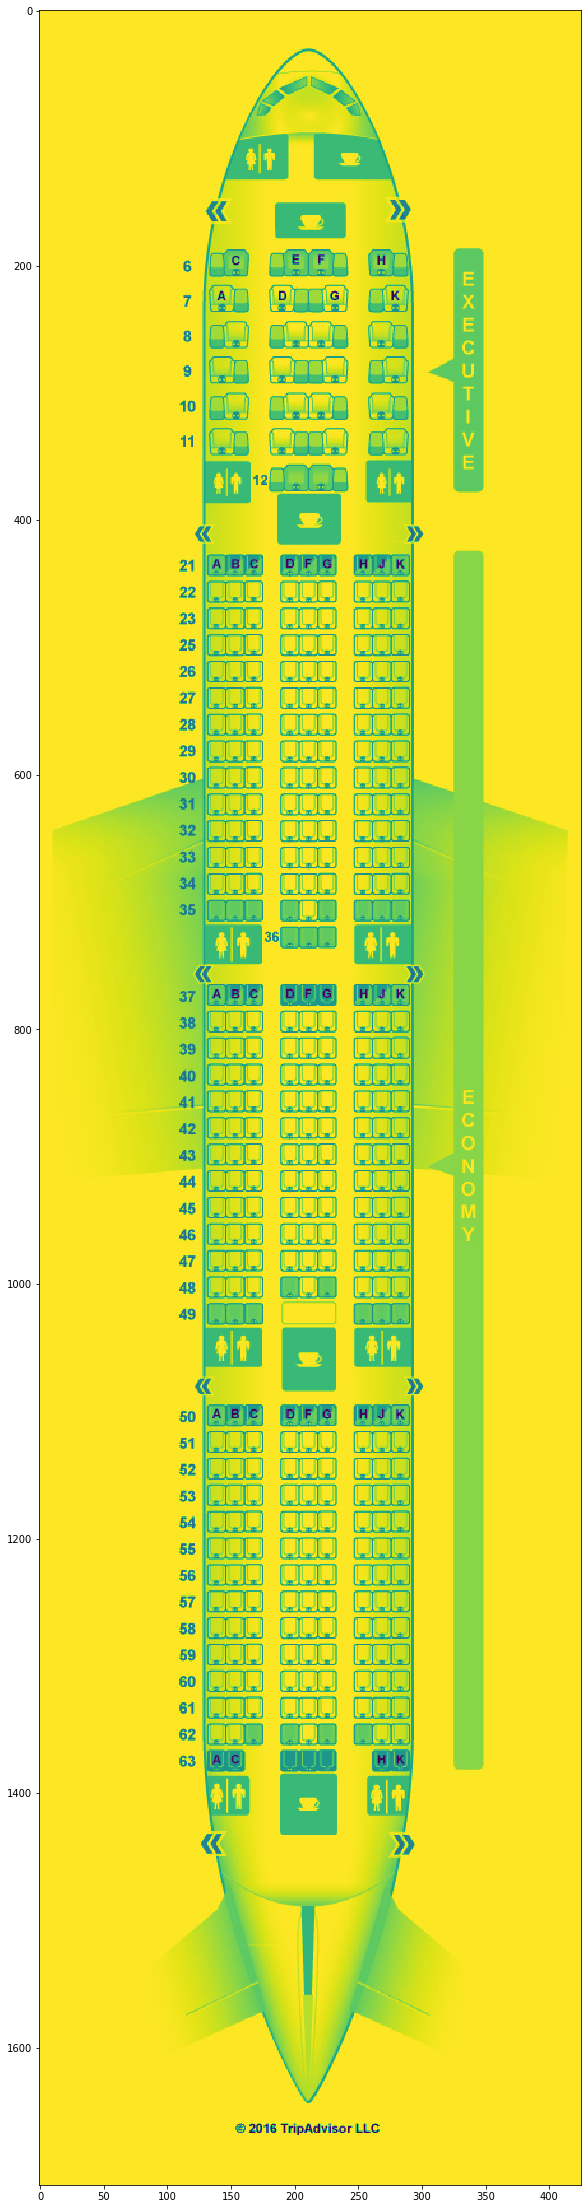

Process :  OpenCV4.1.2.30 -> pattern matching normal seat
Doing : OpenCV4.1.2.30 -> pattern matching normal seat
/data/git-clone/ProjetInterpromo2020G8/LAYOUT_SEATGURU/Garuda_Indonesia_Boeing_777-300ER_V2_plane448.jpg shape (1708, 425)
Le processing numéro 0( OpenCV4.1.2.30 -> pattern matching normal seat ) a levé une erreur.
'NoneType' object has no attribute 'shape'


In [18]:
pipeline.run_pipeline(1, templates = ["temp_normal_seat.jpg"])